In [1]:
from utils import load_psf_and_image, plot_image, to_absolute_path, load_image, RealFFTConvolve2D
from matplotlib import pyplot as plt
import numpy as np

In [2]:
ORIGINAL_IMAGE = "data/lensed/im172.npy"
DIFFUSER_IMAGE = "data/diffuser/im172.npy"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)
original = load_image(to_absolute_path(ORIGINAL_IMAGE))
psf.shape

(1, 270, 480, 3)

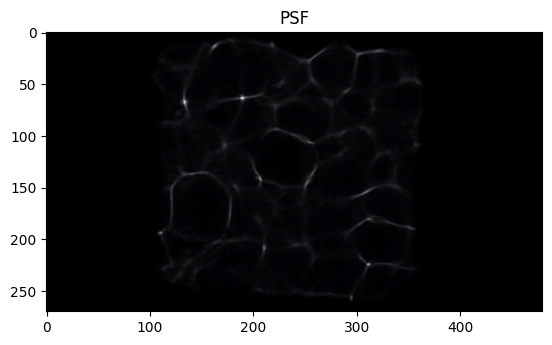

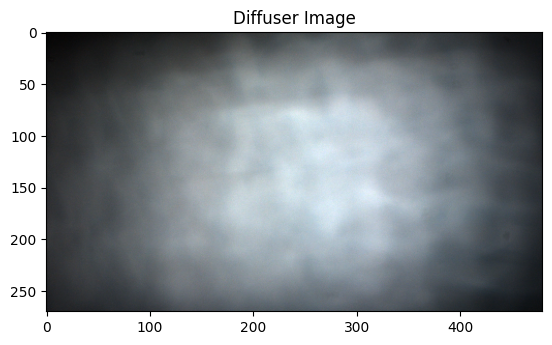

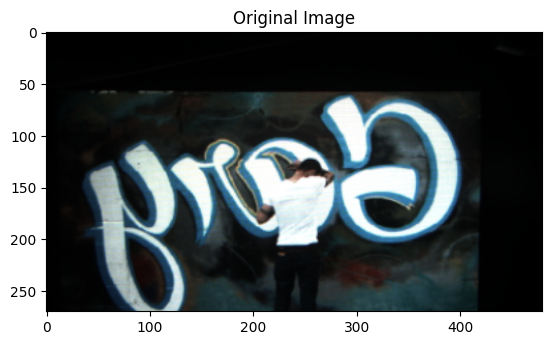

In [3]:
# plt.imshow(psf[0])  # will show a black image, needs gamma correction
plot_image(psf[0])
plt.title("PSF")
plt.show()
plot_image(image)
plt.title("Diffuser Image")
plt.show()
plot_image(original)
plt.title('Original Image')
plt.show()

/Users/ryanmei/Desktop/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
100%|██████████| 1000/1000 [03:10<00:00,  5.26it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


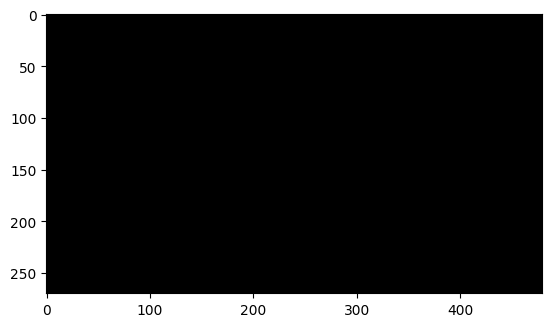

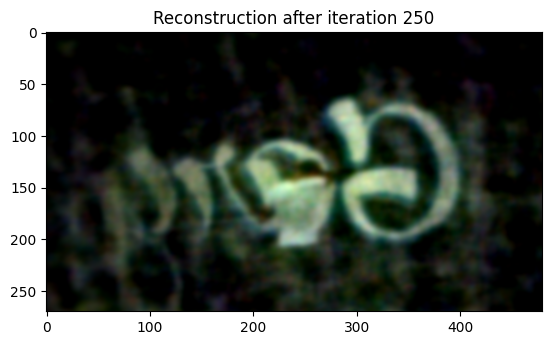

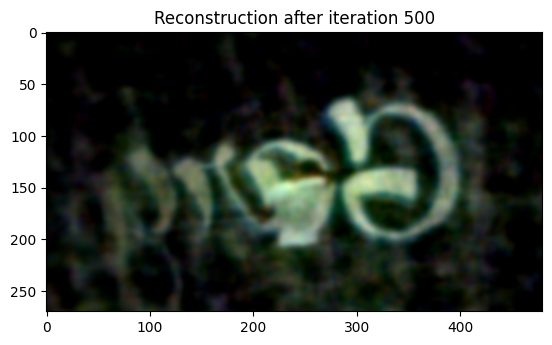

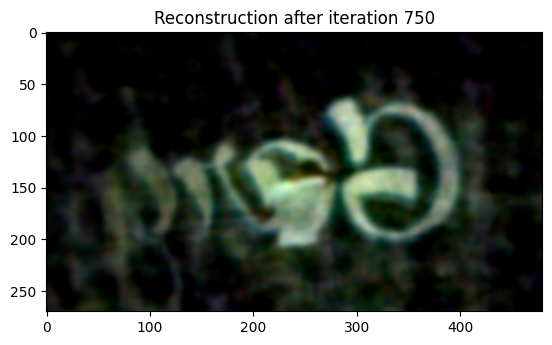

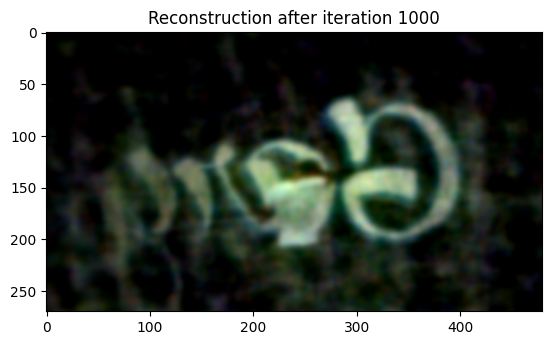

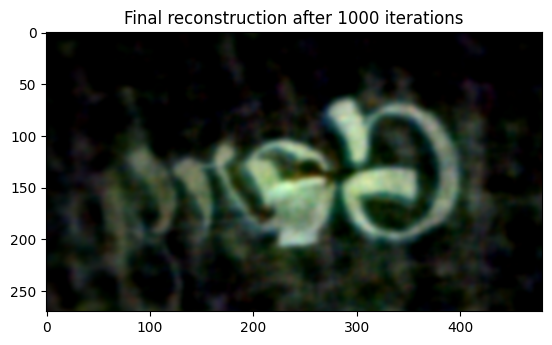

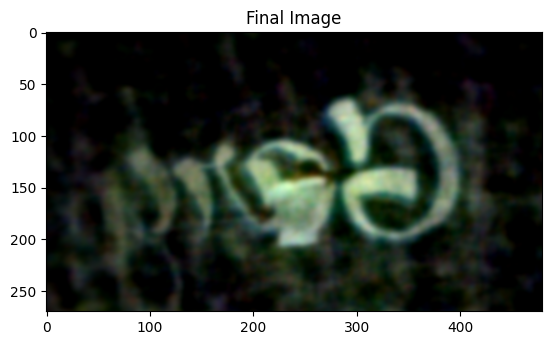

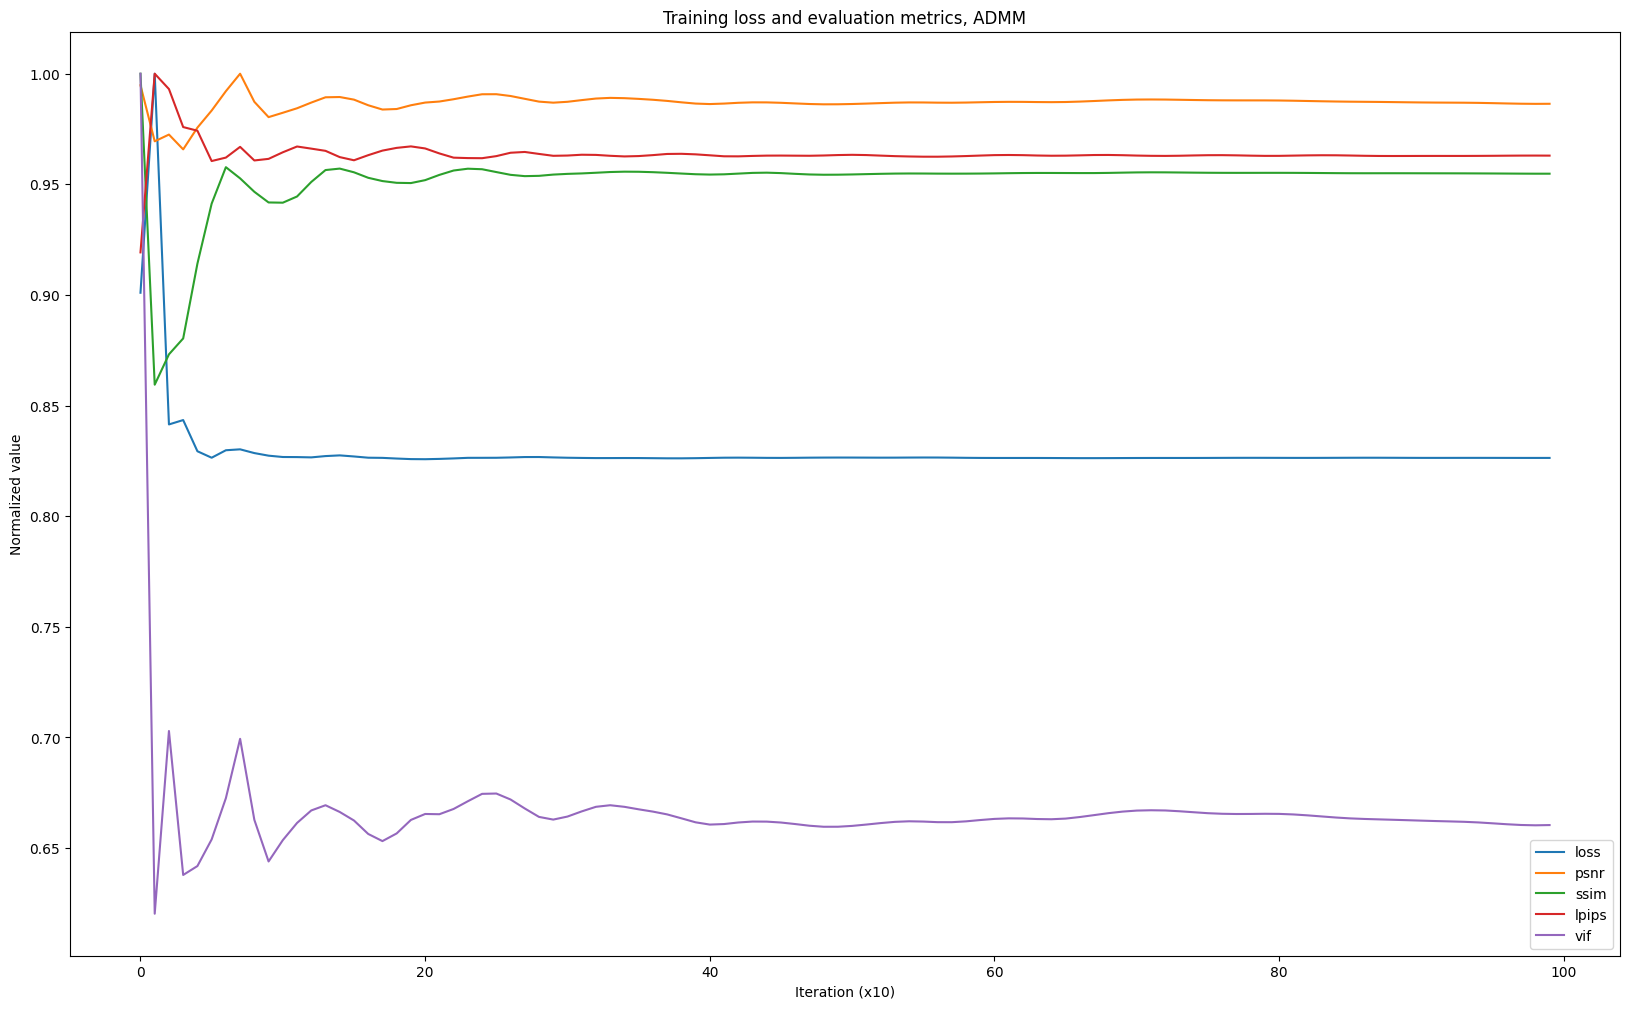

Iteration with the lowest l2 reconstruction loss:  20
Iteration with the highest PSNR:  7
Iteration with the highest SSIM:  0
Iteration with the lowest LPIPS:  0
Iteration with the highest VIF:  0


In [11]:
from algorithms.admm import ADMM

reconstructor = ADMM(psf, original)
reconstructed = reconstructor.apply(image, n_iter=1000, disp_iter=250, eval_iter=10)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(reconstructed[2][0]/np.max(reconstructed[2][0]), label="loss")
plt.plot(reconstructed[2][1]/np.max(reconstructed[2][1]), label="psnr")
plt.plot(reconstructed[2][2]/np.max(reconstructed[2][2]), label="ssim")
plt.plot(reconstructed[2][3]/np.max(reconstructed[2][3]), label="lpips")
plt.plot(reconstructed[2][4]/np.max(reconstructed[2][4]), label="vif")
plt.title("Training loss and evaluation metrics, ADMM")
plt.xlabel("Iteration (x10)")
plt.ylabel("Normalized value")
plt.legend()
plt.show()
print("Iteration with the lowest l2 reconstruction loss: ", np.argmin(reconstructed[2][0]))
print("Iteration with the highest PSNR: ", np.argmax(reconstructed[2][1]))
print("Iteration with the highest SSIM: ", np.argmax(reconstructed[2][2]))
print("Iteration with the lowest LPIPS: ", np.argmin(reconstructed[2][3]))
print("Iteration with the highest VIF: ", np.argmax(reconstructed[2][4]))

/Users/ryanmei/Desktop/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
100%|██████████| 100/100 [00:14<00:00,  7.13it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


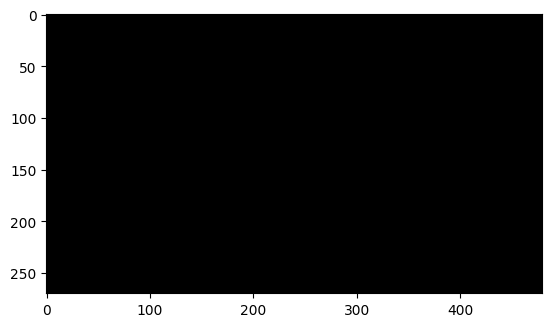

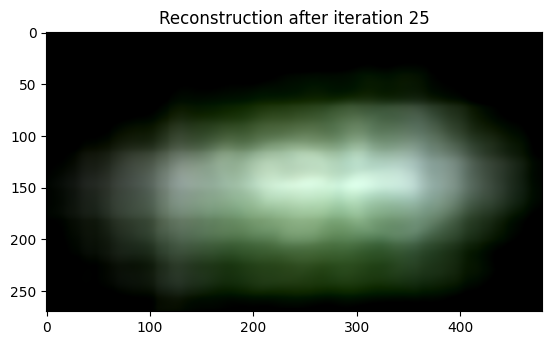

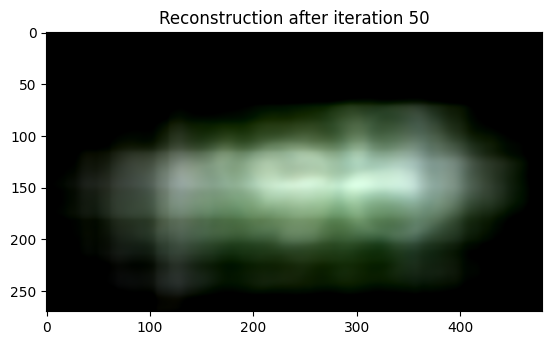

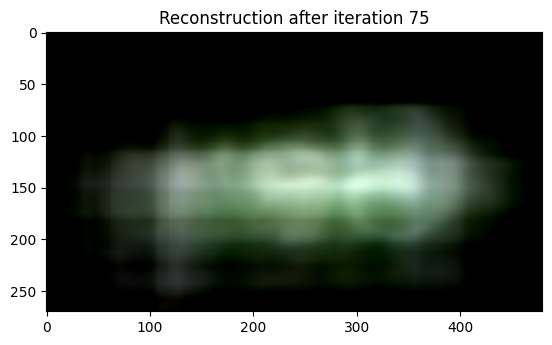

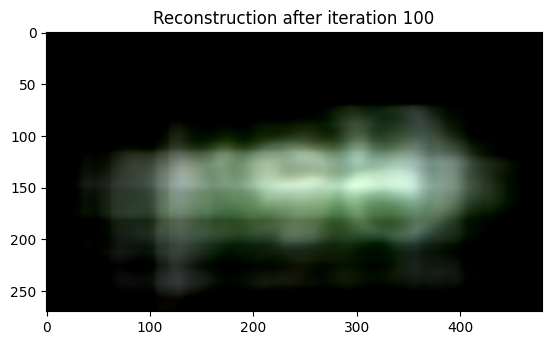

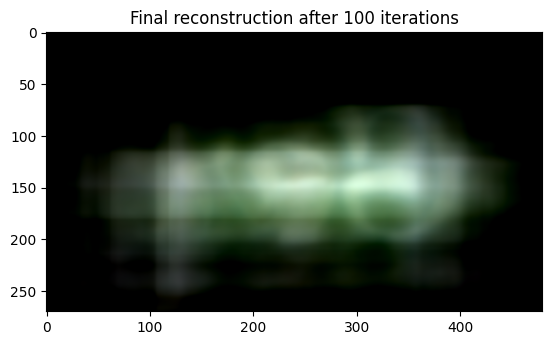

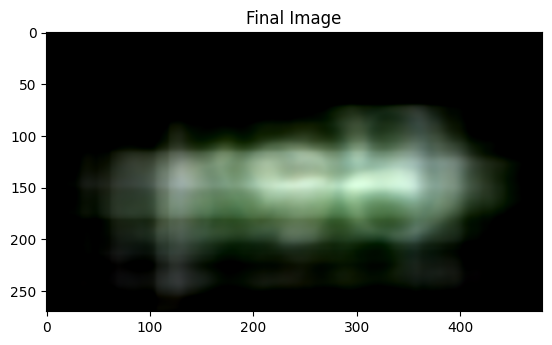

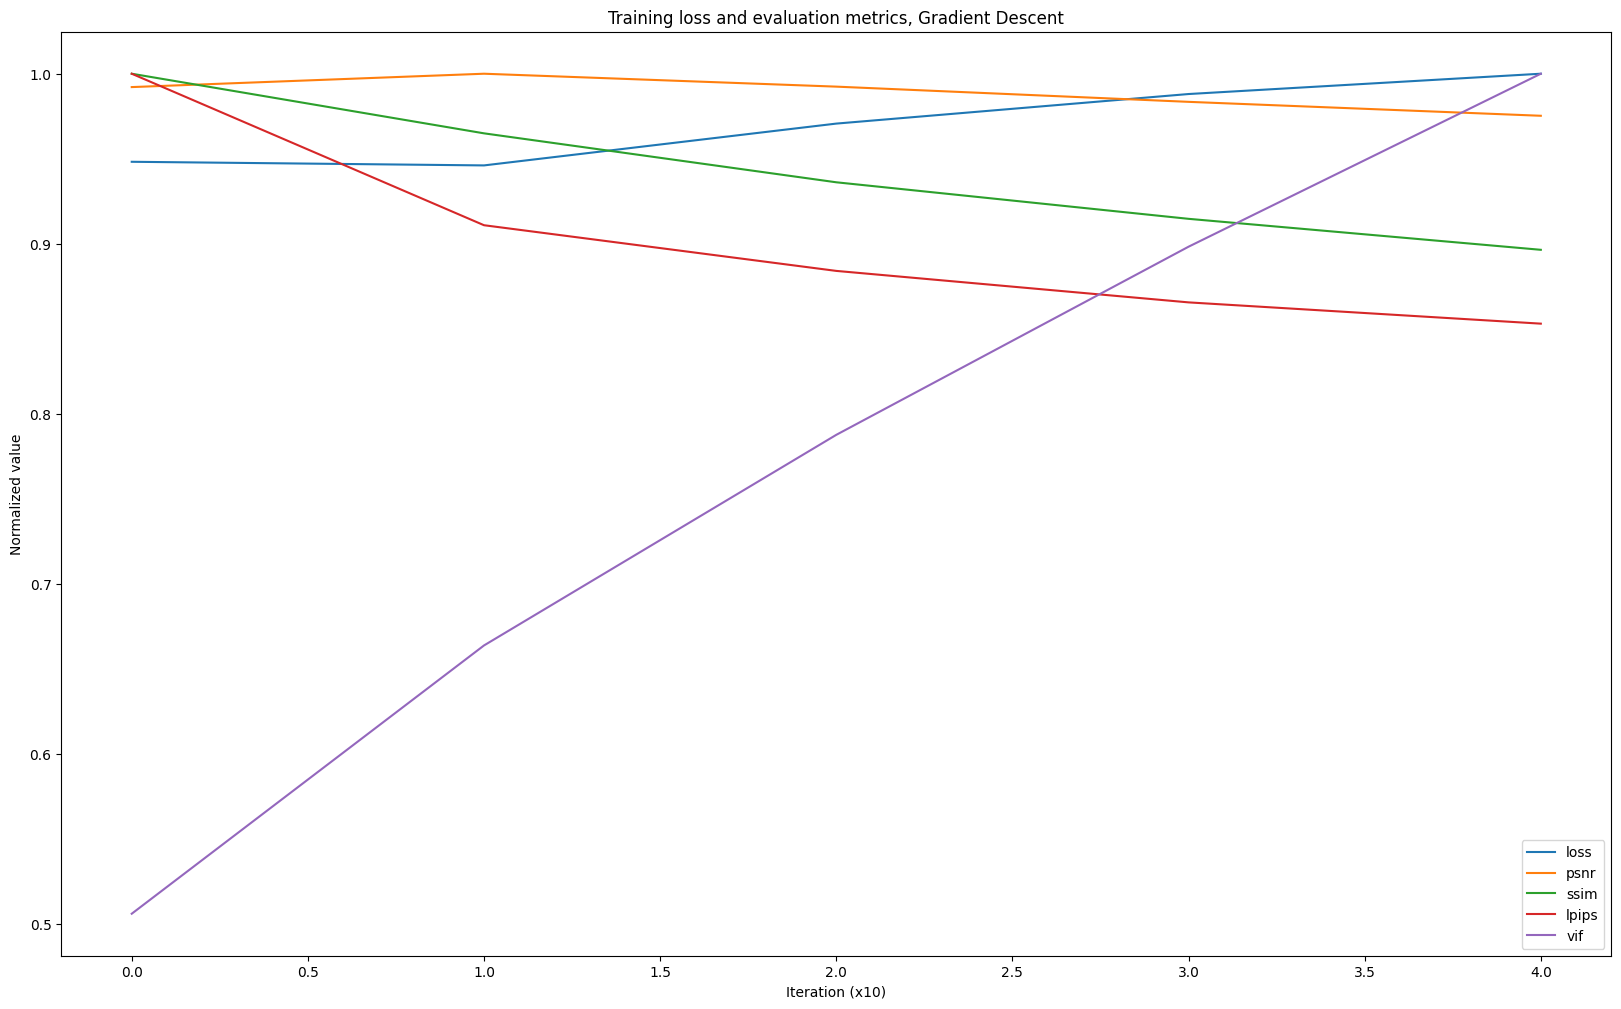

Iteration with the lowest l2 reconstruction loss:  1
Iteration with the highest PSNR:  1
Iteration with the highest SSIM:  0
Iteration with the lowest LPIPS:  4
Iteration with the highest VIF:  4


In [4]:
from algorithms.gradient_descent import gradient_descent

reconstructor = gradient_descent(psf, original)
reconstructed = reconstructor.apply(image, n_iter=100, disp_iter=25, eval_iter=20)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(reconstructed[2][0]/np.max(reconstructed[2][0]), label="loss")
plt.plot(reconstructed[2][1]/np.max(reconstructed[2][1]), label="psnr")
plt.plot(reconstructed[2][2]/np.max(reconstructed[2][2]), label="ssim")
plt.plot(reconstructed[2][3]/np.max(reconstructed[2][3]), label="lpips")
plt.plot(reconstructed[2][4]/np.max(reconstructed[2][4]), label="vif")
plt.title("Training loss and evaluation metrics, Gradient Descent")
plt.xlabel("Iteration (x10)")
plt.ylabel("Normalized value")
plt.legend()
plt.show()
print("Iteration with the lowest l2 reconstruction loss: ", np.argmin(reconstructed[2][0]))
print("Iteration with the highest PSNR: ", np.argmax(reconstructed[2][1]))
print("Iteration with the highest SSIM: ", np.argmax(reconstructed[2][2]))
print("Iteration with the lowest LPIPS: ", np.argmin(reconstructed[2][3]))
print("Iteration with the highest VIF: ", np.argmax(reconstructed[2][4]))

100%|██████████| 100/100 [00:13<00:00,  7.25it/s]


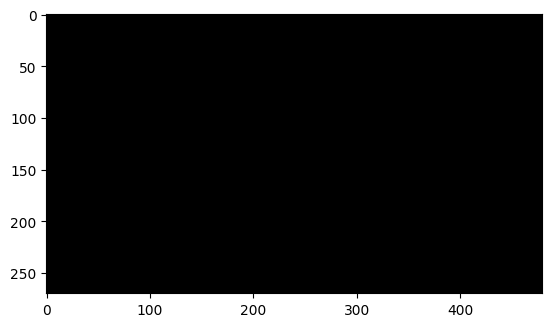

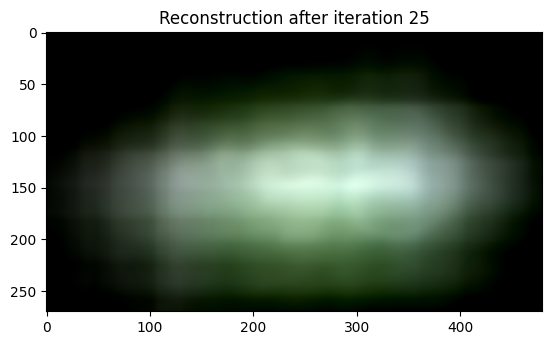

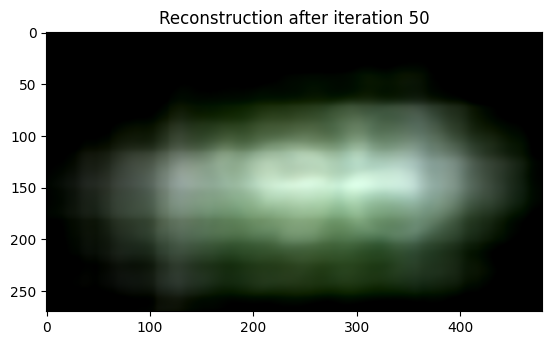

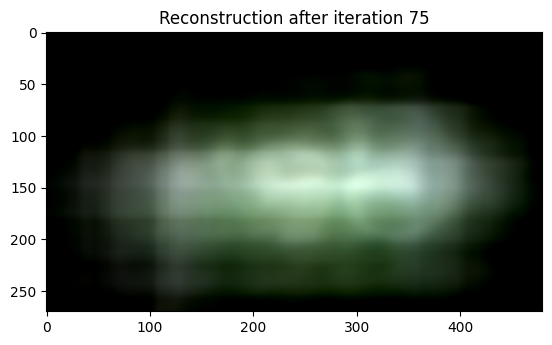

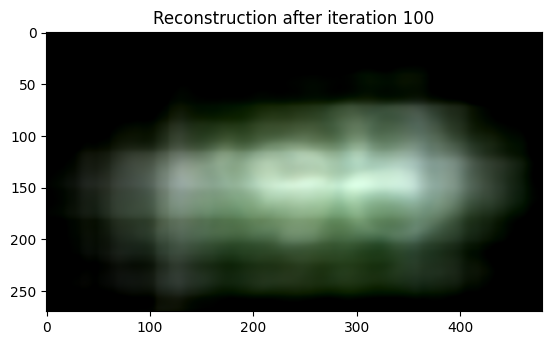

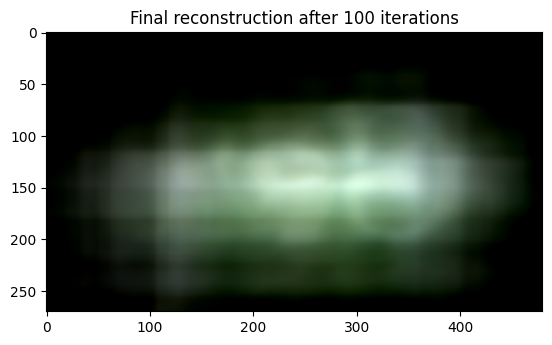

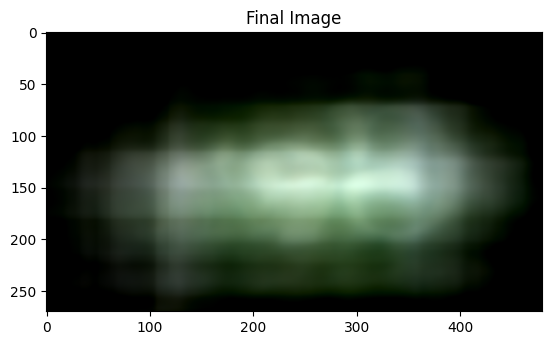

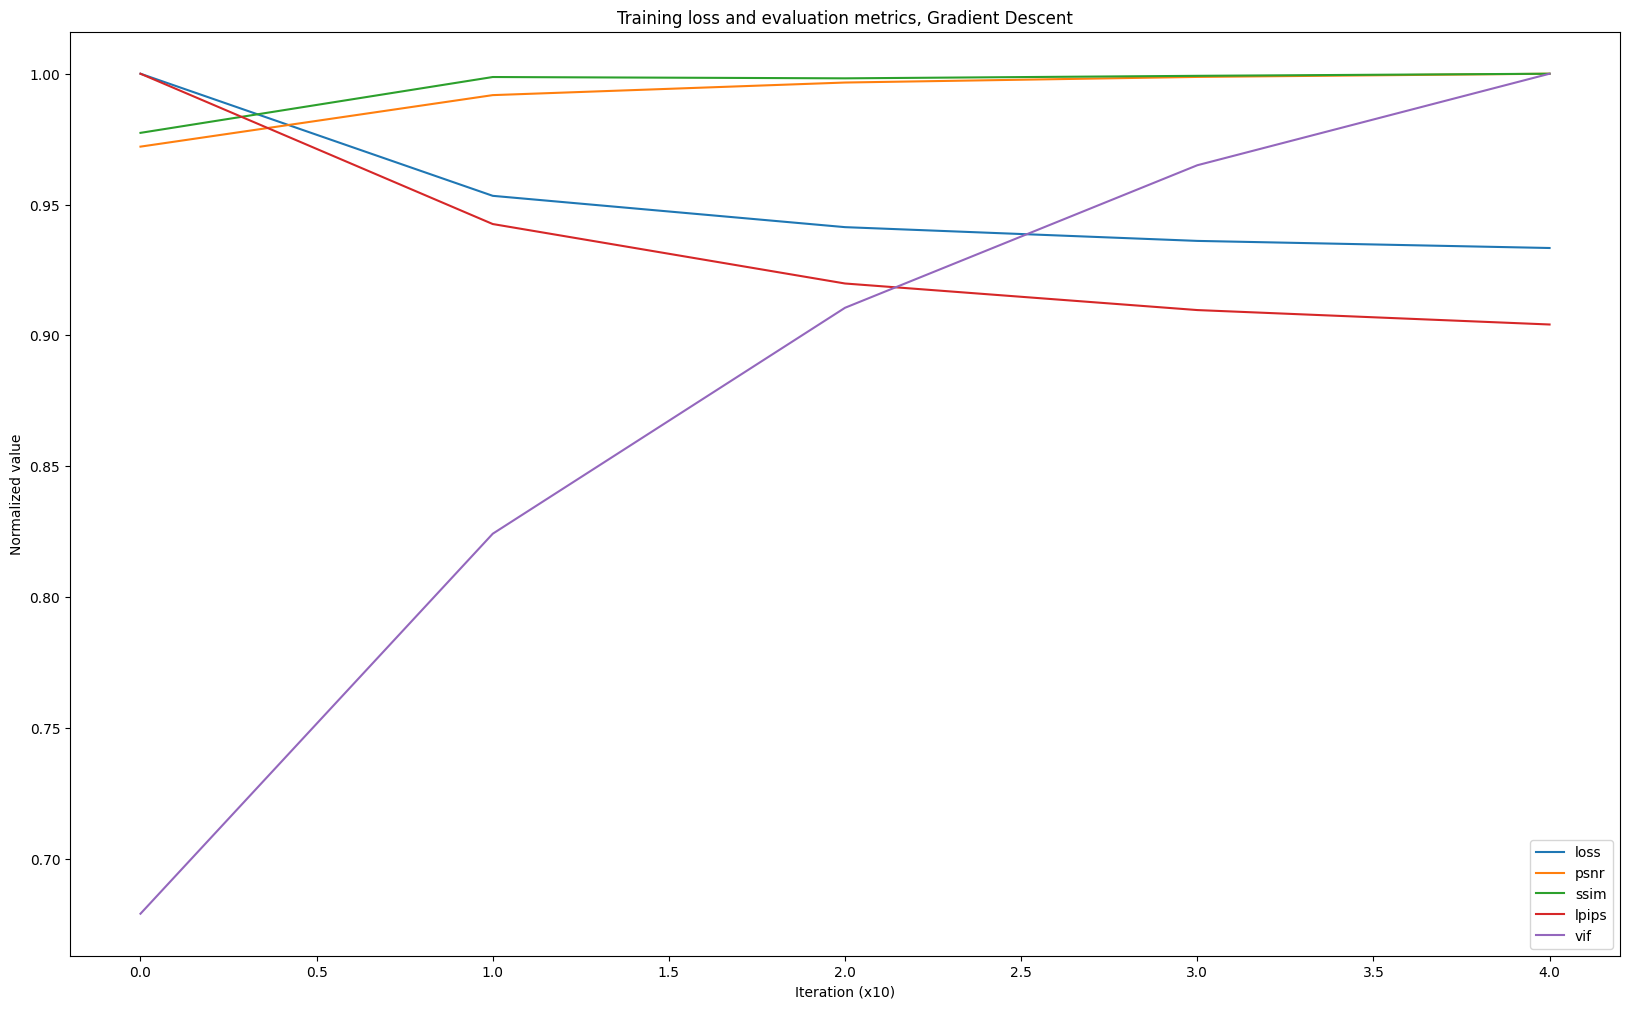

Iteration with the lowest l2 reconstruction loss:  4
Iteration with the highest PSNR:  4
Iteration with the highest SSIM:  4
Iteration with the lowest LPIPS:  4
Iteration with the highest VIF:  4


In [6]:
from algorithms.gradient_descent import gradient_descent

reconstructor = gradient_descent(psf, original)
reconstructed = reconstructor.apply(image, n_iter=100, disp_iter=25, eval_iter=20, prior='sparse', alpha=0.02)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(reconstructed[2][0]/np.max(reconstructed[2][0]), label="loss")
plt.plot(reconstructed[2][1]/np.max(reconstructed[2][1]), label="psnr")
plt.plot(reconstructed[2][2]/np.max(reconstructed[2][2]), label="ssim")
plt.plot(reconstructed[2][3]/np.max(reconstructed[2][3]), label="lpips")
plt.plot(reconstructed[2][4]/np.max(reconstructed[2][4]), label="vif")
plt.title("Training loss and evaluation metrics, Gradient Descent")
plt.xlabel("Iteration (x10)")
plt.ylabel("Normalized value")
plt.legend()
plt.show()
print("Iteration with the lowest l2 reconstruction loss: ", np.argmin(reconstructed[2][0]))
print("Iteration with the highest PSNR: ", np.argmax(reconstructed[2][1]))
print("Iteration with the highest SSIM: ", np.argmax(reconstructed[2][2]))
print("Iteration with the lowest LPIPS: ", np.argmin(reconstructed[2][3]))
print("Iteration with the highest VIF: ", np.argmax(reconstructed[2][4]))

100%|██████████| 100/100 [00:18<00:00,  5.30it/s]


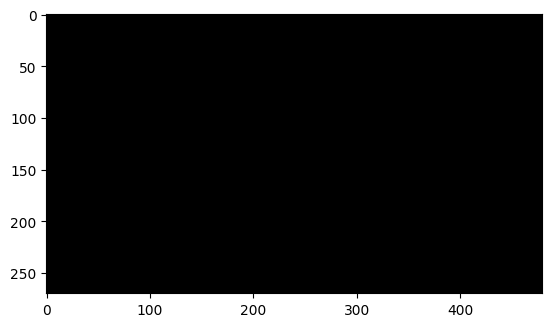

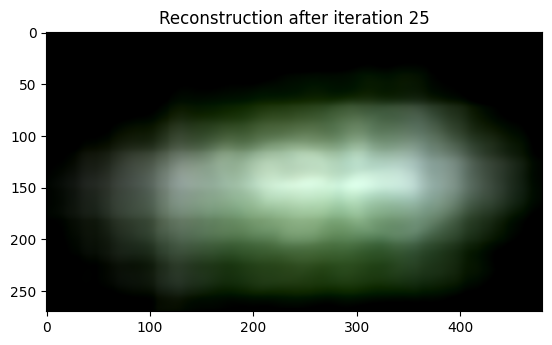

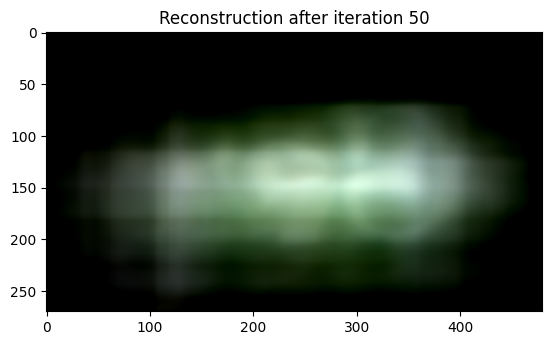

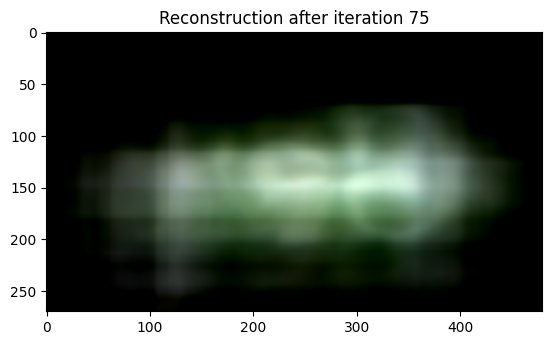

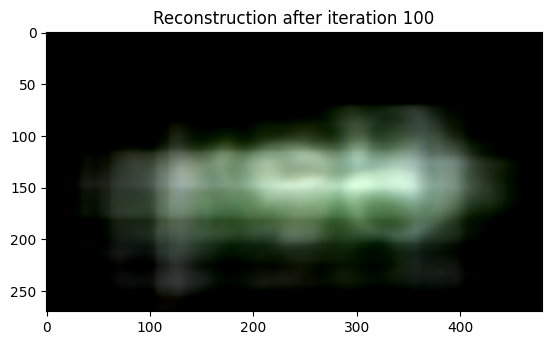

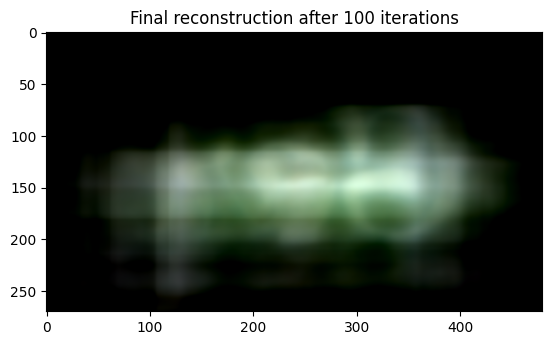

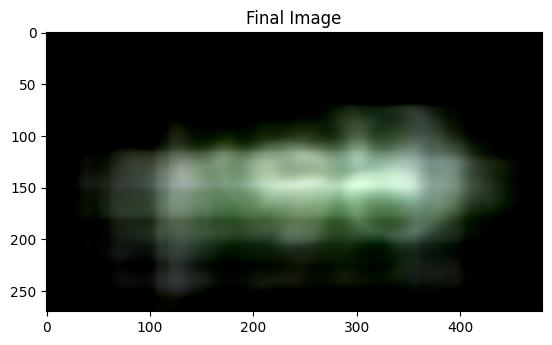

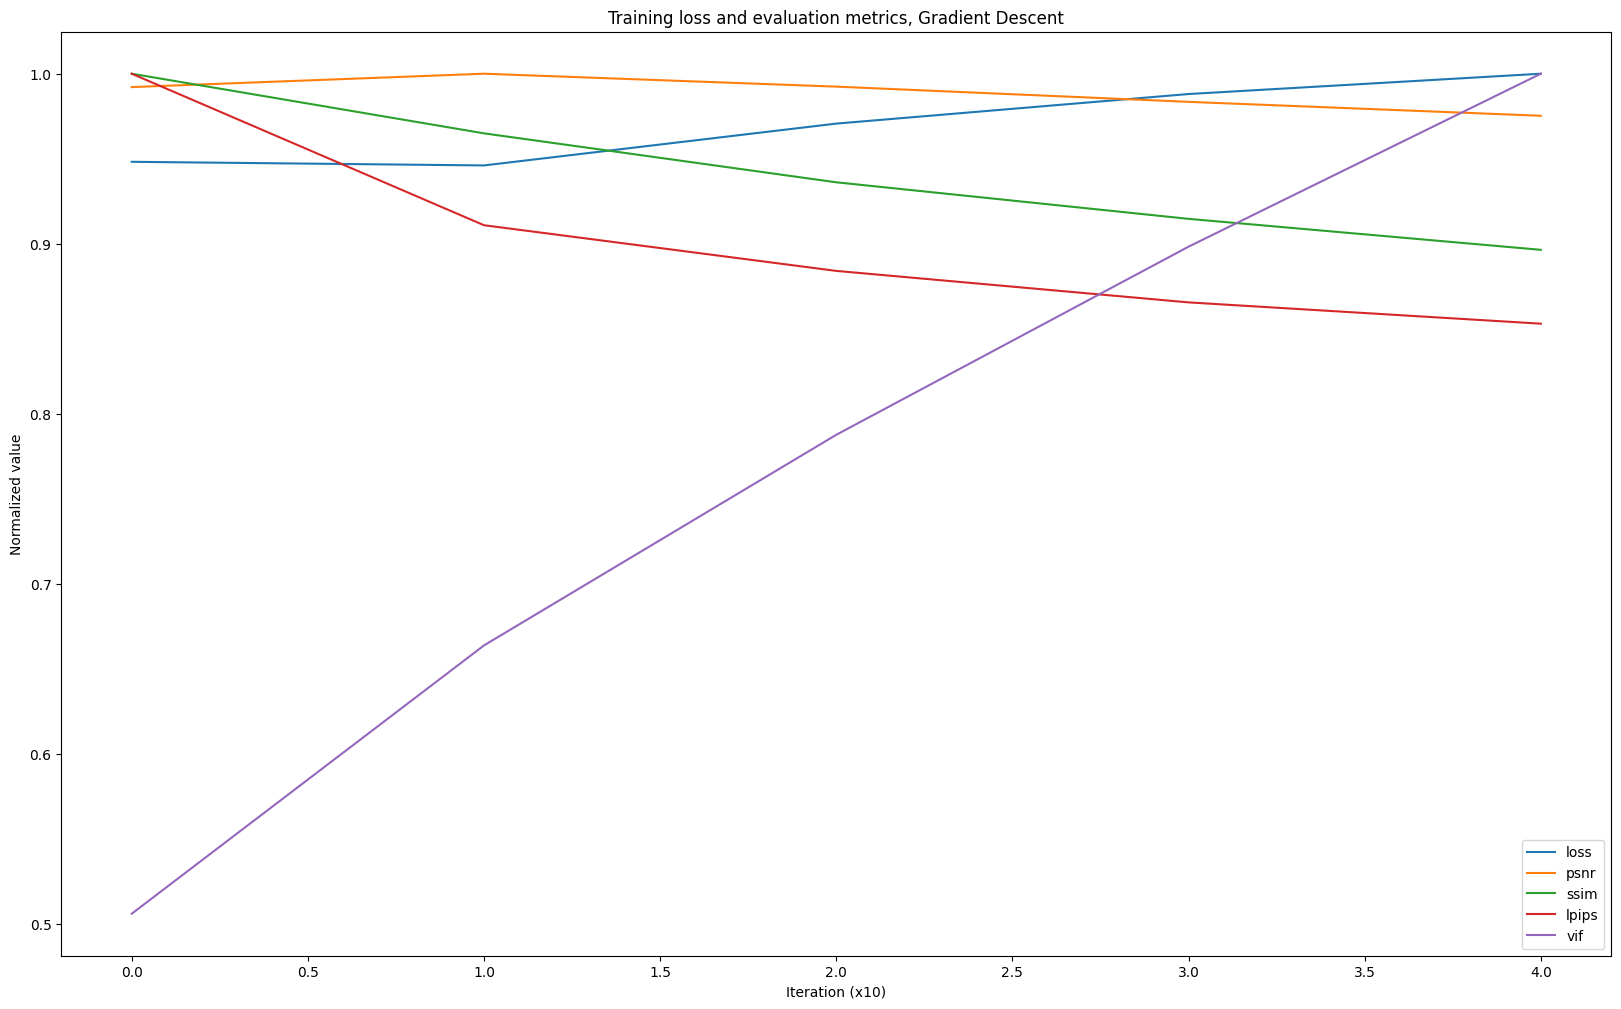

Iteration with the lowest l2 reconstruction loss:  1
Iteration with the highest PSNR:  1
Iteration with the highest SSIM:  0
Iteration with the lowest LPIPS:  4
Iteration with the highest VIF:  4


In [7]:
from algorithms.gradient_descent import gradient_descent

reconstructor = gradient_descent(psf, original)
reconstructed = reconstructor.apply(image, n_iter=100, disp_iter=25, eval_iter=20, prior='tv', alpha=0.02)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(reconstructed[2][0]/np.max(reconstructed[2][0]), label="loss")
plt.plot(reconstructed[2][1]/np.max(reconstructed[2][1]), label="psnr")
plt.plot(reconstructed[2][2]/np.max(reconstructed[2][2]), label="ssim")
plt.plot(reconstructed[2][3]/np.max(reconstructed[2][3]), label="lpips")
plt.plot(reconstructed[2][4]/np.max(reconstructed[2][4]), label="vif")
plt.title("Training loss and evaluation metrics, Gradient Descent")
plt.xlabel("Iteration (x10)")
plt.ylabel("Normalized value")
plt.legend()
plt.show()
print("Iteration with the lowest l2 reconstruction loss: ", np.argmin(reconstructed[2][0]))
print("Iteration with the highest PSNR: ", np.argmax(reconstructed[2][1]))
print("Iteration with the highest SSIM: ", np.argmax(reconstructed[2][2]))
print("Iteration with the lowest LPIPS: ", np.argmin(reconstructed[2][3]))
print("Iteration with the highest VIF: ", np.argmax(reconstructed[2][4]))

100%|██████████| 1000/1000 [02:18<00:00,  7.24it/s]


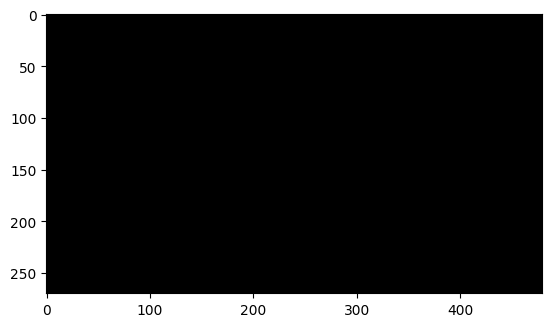

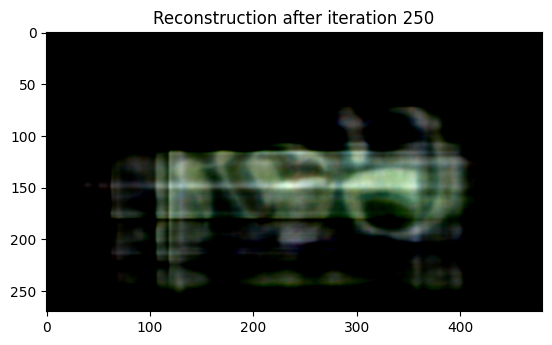

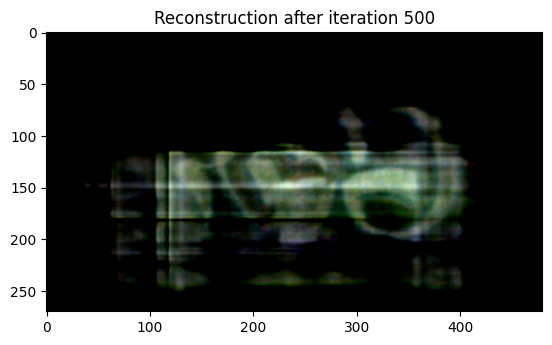

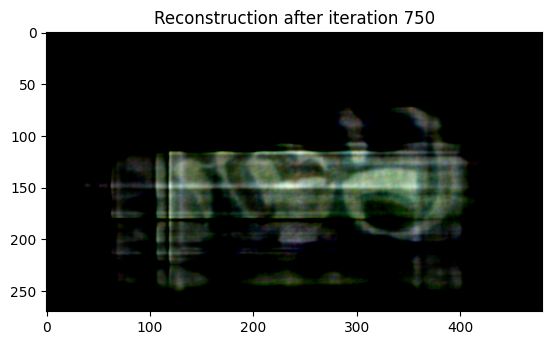

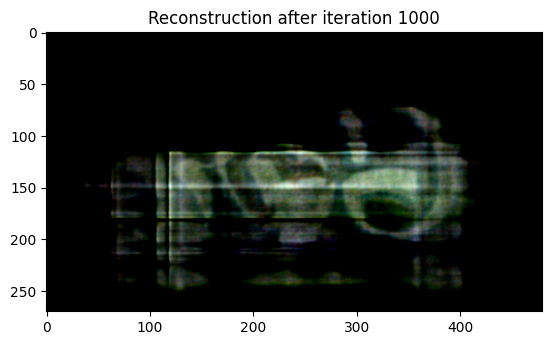

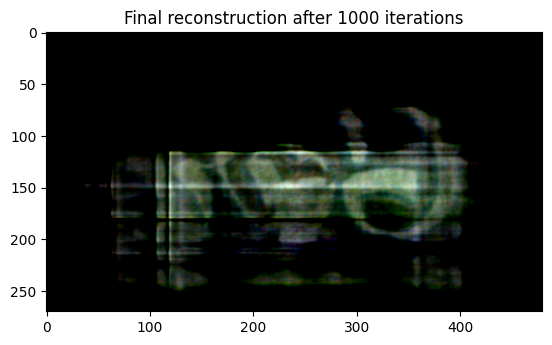

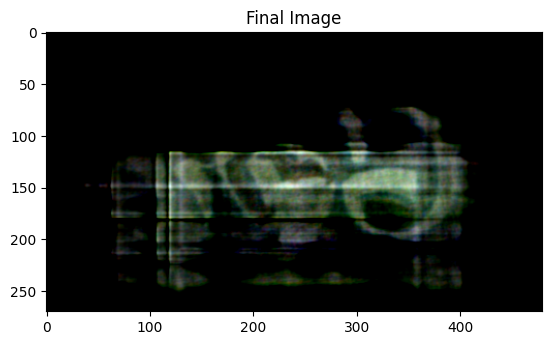

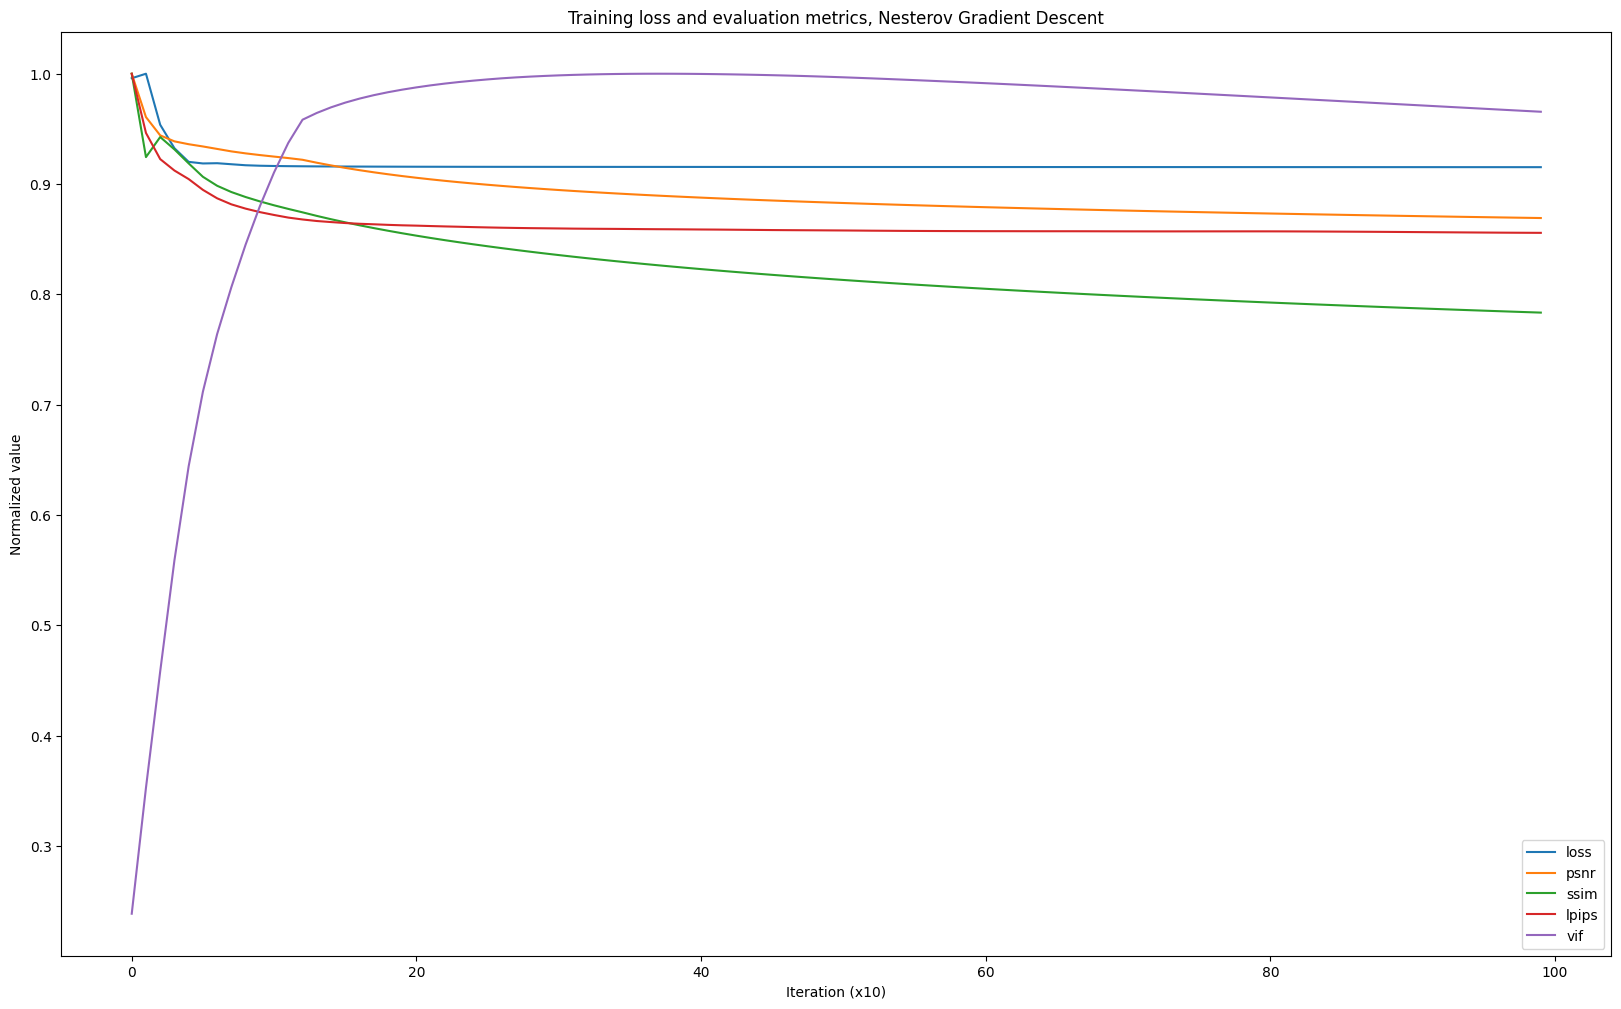

Iteration with the lowest l2 reconstruction loss:  99
Iteration with the highest PSNR:  0
Iteration with the highest SSIM:  0
Iteration with the lowest LPIPS:  99
Iteration with the highest VIF:  37


In [6]:
from algorithms.nesterov import nesterov_gradient_descent

reconstructor = nesterov_gradient_descent(psf, original)
reconstructed = reconstructor.apply(image, n_iter=1000, disp_iter=250, eval_iter=10)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(reconstructed[2][0]/np.max(reconstructed[2][0]), label="loss")
plt.plot(reconstructed[2][1]/np.max(reconstructed[2][1]), label="psnr")
plt.plot(reconstructed[2][2]/np.max(reconstructed[2][2]), label="ssim")
plt.plot(reconstructed[2][3]/np.max(reconstructed[2][3]), label="lpips")
plt.plot(reconstructed[2][4]/np.max(reconstructed[2][4]), label="vif")
plt.title("Training loss and evaluation metrics, Nesterov Gradient Descent")
plt.xlabel("Iteration (x10)")
plt.ylabel("Normalized value")
plt.legend()
plt.show()
print("Iteration with the lowest l2 reconstruction loss: ", np.argmin(reconstructed[2][0]))
print("Iteration with the highest PSNR: ", np.argmax(reconstructed[2][1]))
print("Iteration with the highest SSIM: ", np.argmax(reconstructed[2][2]))
print("Iteration with the lowest LPIPS: ", np.argmin(reconstructed[2][3]))
print("Iteration with the highest VIF: ", np.argmax(reconstructed[2][4]))

100%|██████████| 1000/1000 [02:16<00:00,  7.33it/s]


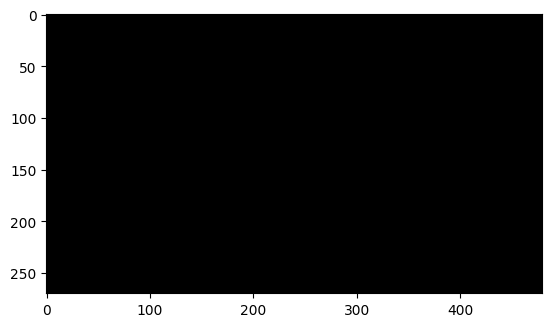

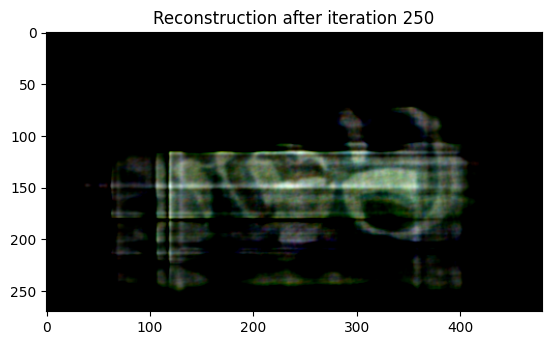

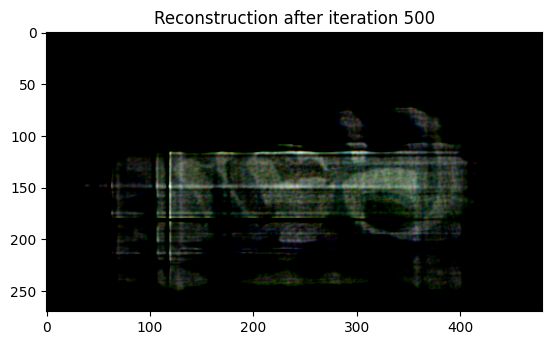

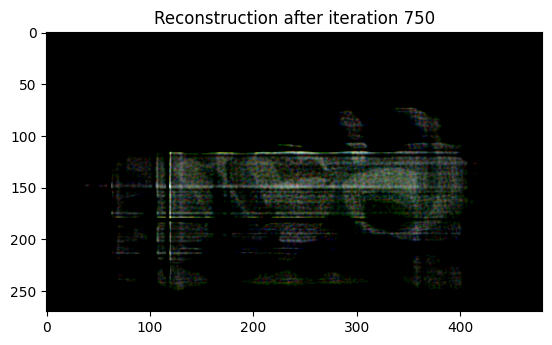

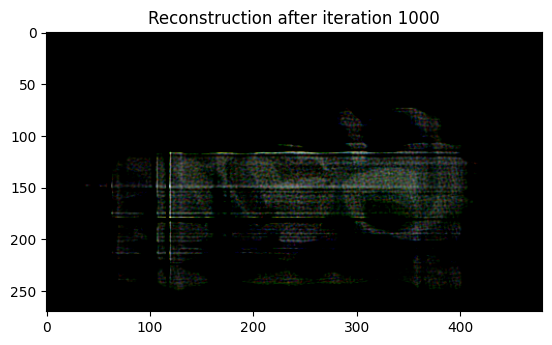

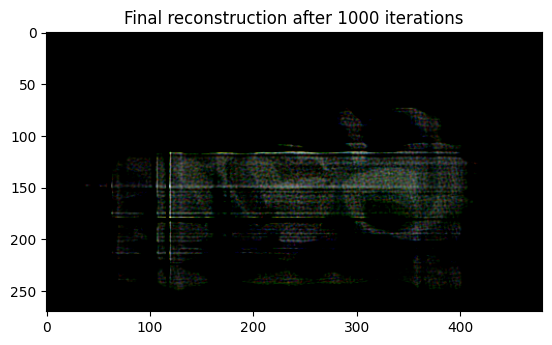

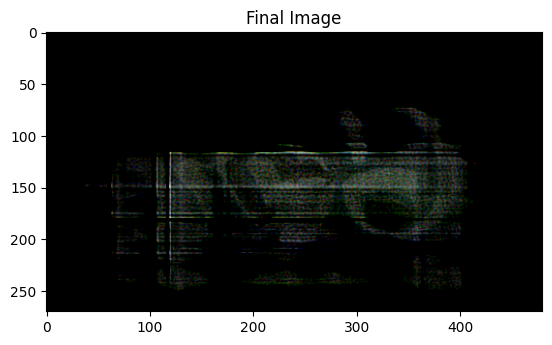

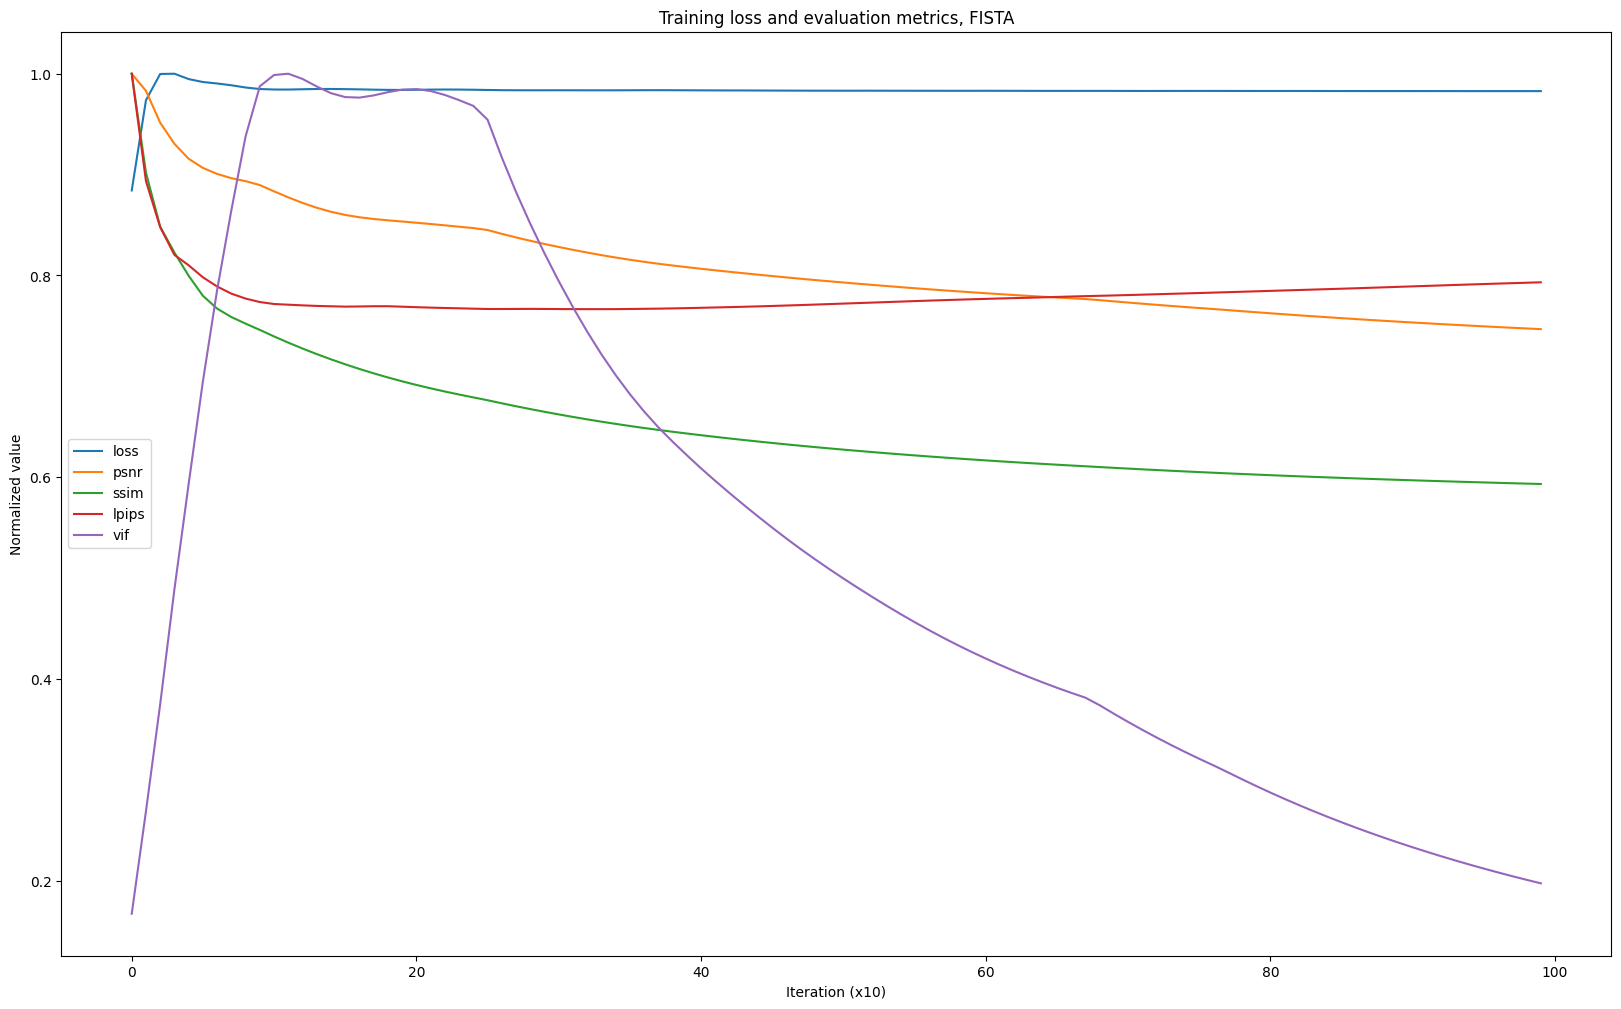

Iteration with the lowest l2 reconstruction loss:  0
Iteration with the highest PSNR:  0
Iteration with the highest SSIM:  0
Iteration with the lowest LPIPS:  33
Iteration with the highest VIF:  11


In [5]:
from algorithms.fista import FISTA

reconstructor = FISTA(psf, original)
reconstructed = reconstructor.apply(image, n_iter=1000, disp_iter=250, eval_iter=10)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(reconstructed[2][0]/np.max(reconstructed[2][0]), label="loss")
plt.plot(reconstructed[2][1]/np.max(reconstructed[2][1]), label="psnr")
plt.plot(reconstructed[2][2]/np.max(reconstructed[2][2]), label="ssim")
plt.plot(reconstructed[2][3]/np.max(reconstructed[2][3]), label="lpips")
plt.plot(reconstructed[2][4]/np.max(reconstructed[2][4]), label="vif")
plt.title("Training loss and evaluation metrics, FISTA")
plt.xlabel("Iteration (x10)")
plt.ylabel("Normalized value")
plt.legend()
plt.show()
print("Iteration with the lowest l2 reconstruction loss: ", np.argmin(reconstructed[2][0]))
print("Iteration with the highest PSNR: ", np.argmax(reconstructed[2][1]))
print("Iteration with the highest SSIM: ", np.argmax(reconstructed[2][2]))
print("Iteration with the lowest LPIPS: ", np.argmin(reconstructed[2][3]))
print("Iteration with the highest VIF: ", np.argmax(reconstructed[2][4]))

In [23]:
ORIGINAL_IMAGE = "data/lensed/im16499.npy"
DIFFUSER_IMAGE = "data/diffuser/im16499.npy"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)
original = load_image(to_absolute_path(ORIGINAL_IMAGE))
psf.shape

(1, 270, 480, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Final Image')

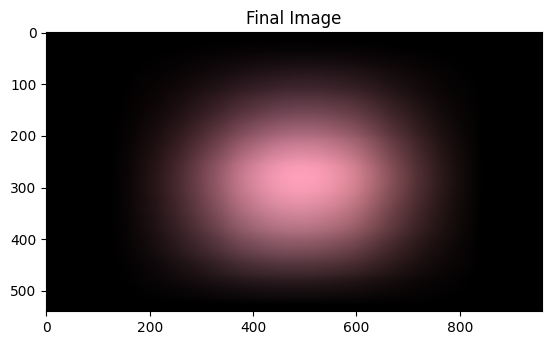

In [24]:
# Stupid algorithm
convolver = RealFFTConvolve2D(psf)
reconstructed = convolver.deconvolve(convolver.pad(np.expand_dims(image, axis=0)))[0]
plot_image(reconstructed).set_title("Final Image")